In [1]:
import pandas as pd
import numpy as np
from numpy import percentile
import datetime as dt
import matplotlib.pyplot as plt
plt.style.use({'figure.facecolor':'white'})
from sklearn.preprocessing import StandardScaler
from pyod.models.hbos import HBOS

### Data Import

In [2]:
df = pd.read_csv('../../data/dataset.csv', parse_dates=['datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131184 entries, 0 to 131183
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   ou        131184 non-null  float64       
 1   datetime  131184 non-null  datetime64[ns]
 2   cheques   131184 non-null  int64         
 3   rto       131184 non-null  float64       
 4   n_sku     131184 non-null  int64         
 5   cnt       131184 non-null  int64         
 6   cashnum   131184 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 7.0 MB


In [3]:
df.head()

,ou,datetime,cheques,rto,n_sku,cnt,cashnum
0,468.0,2019-11-16 08:00:00,34,8003.0,137,173,3
1,468.0,2019-11-16 09:00:00,40,20129.0,283,517,2
2,468.0,2019-11-16 10:00:00,41,15782.0,185,227,2
3,468.0,2019-11-16 11:00:00,63,39451.0,386,659,4
4,468.0,2019-11-16 12:00:00,84,57330.0,635,992,4


### Visualization timeseries

In [4]:
def show_plots(df, columns, anomaly_column=None):
    fig, axs = plt.subplots(len(columns), 1, sharex=True, constrained_layout=True, figsize=(12,10))
    for i in range(len(columns)):
        c = columns[i]

        axs[i].plot(dd.index, df[c], color='gray',label='Normal')

        if anomaly_column:
            a = df.loc[df[anomaly_column] == 1, [c]] #anomaly
            axs[i].scatter(a.index, a[c], color='red', label='Anomaly')

        axs[i].xaxis_date()
        axs[i].set_title(c)
        plt.xlabel('Date')
    plt.show()

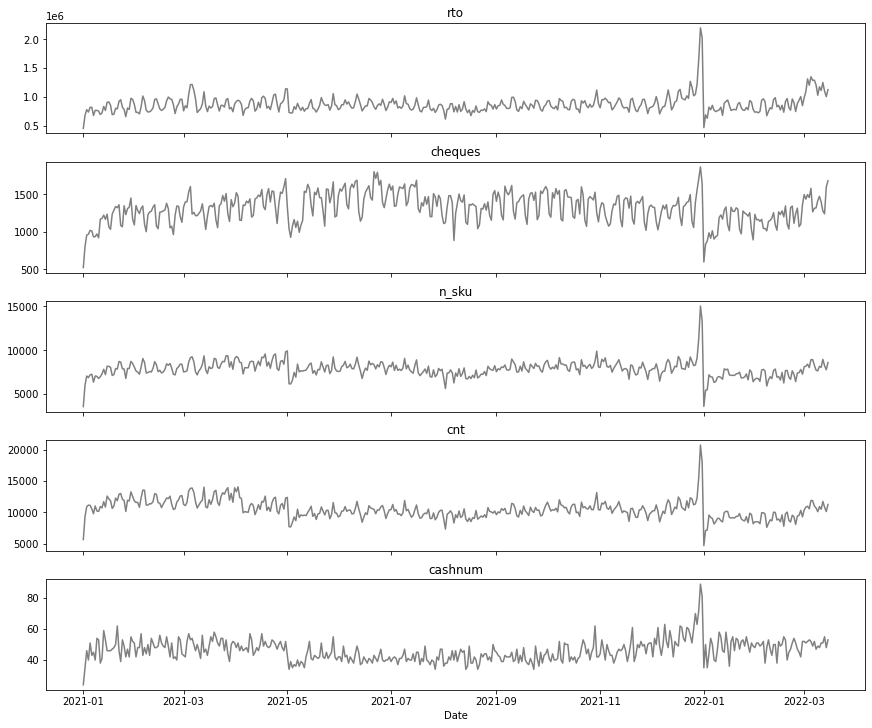

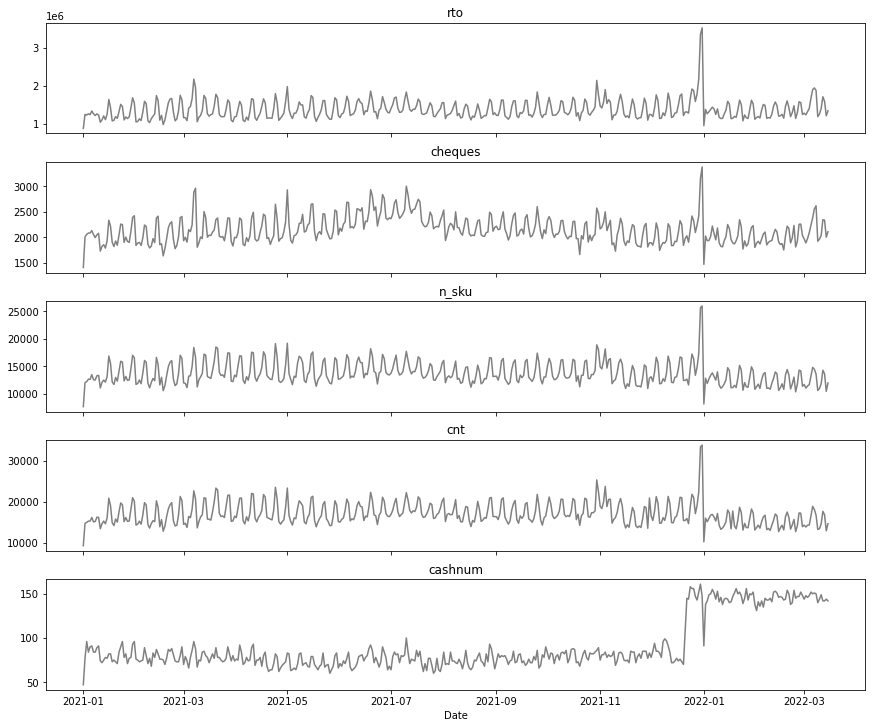

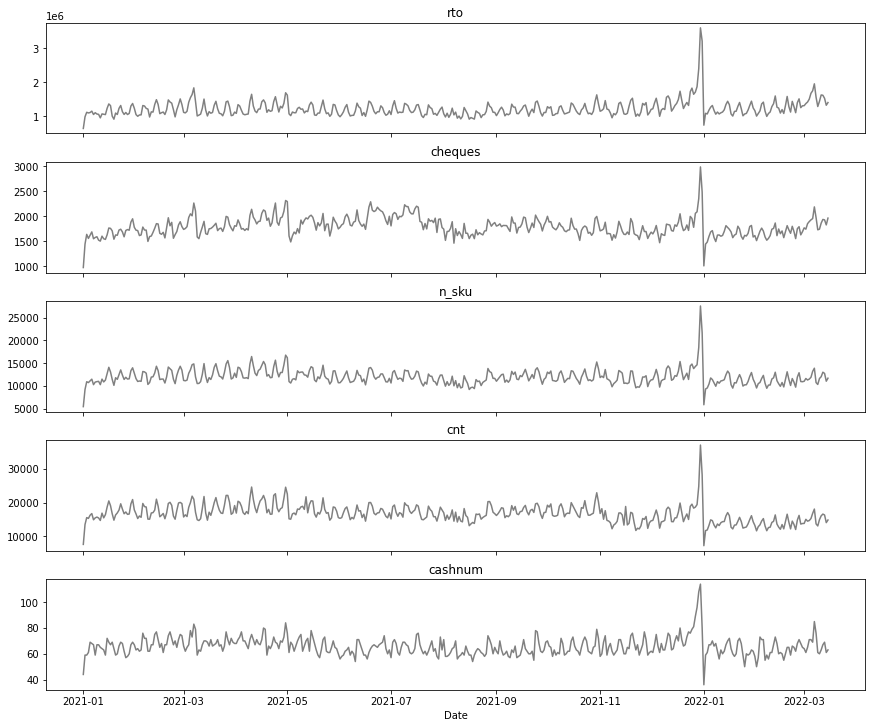

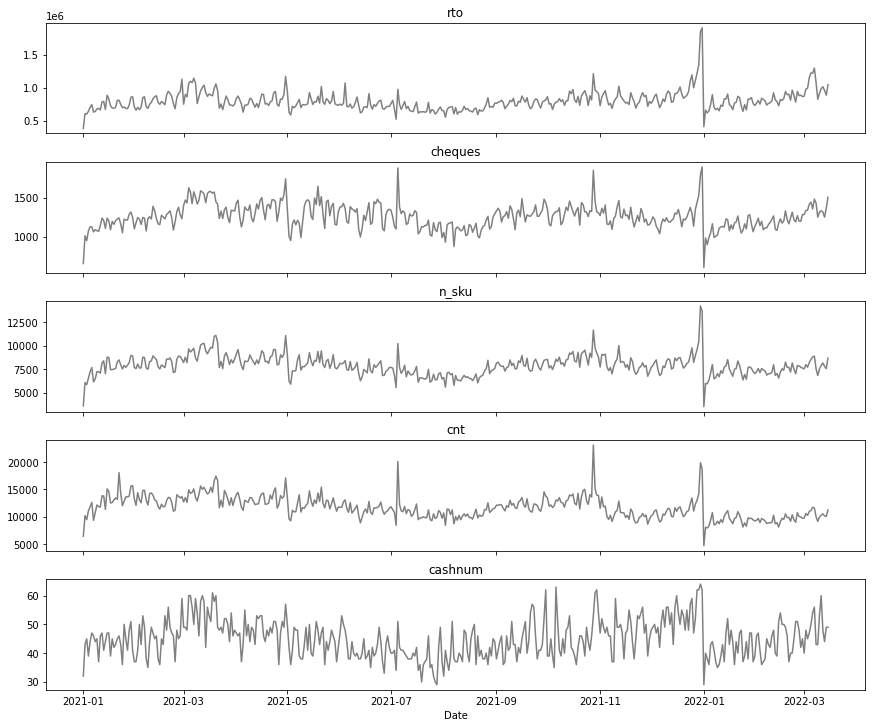

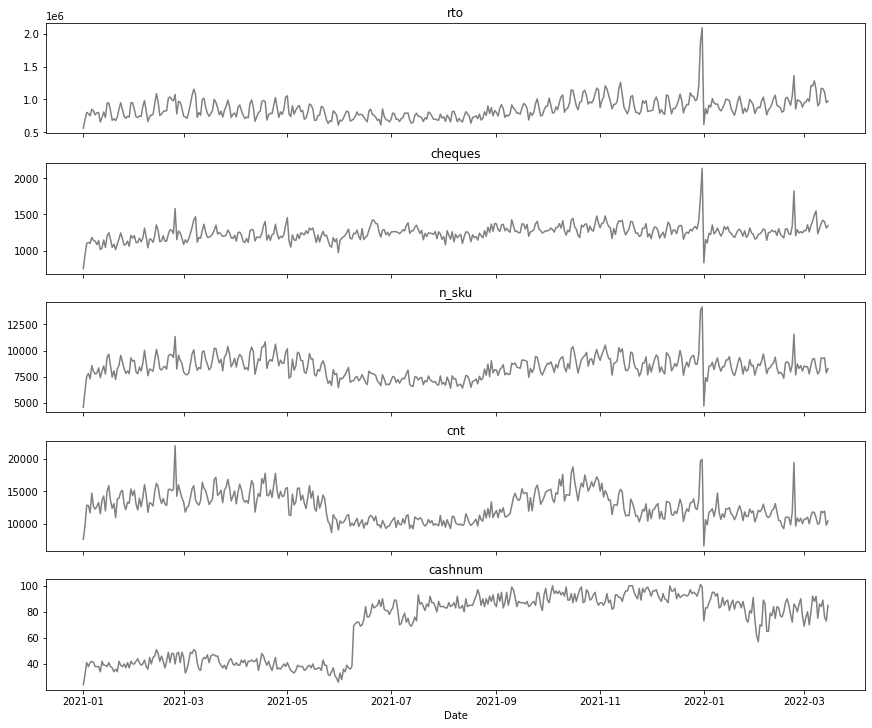

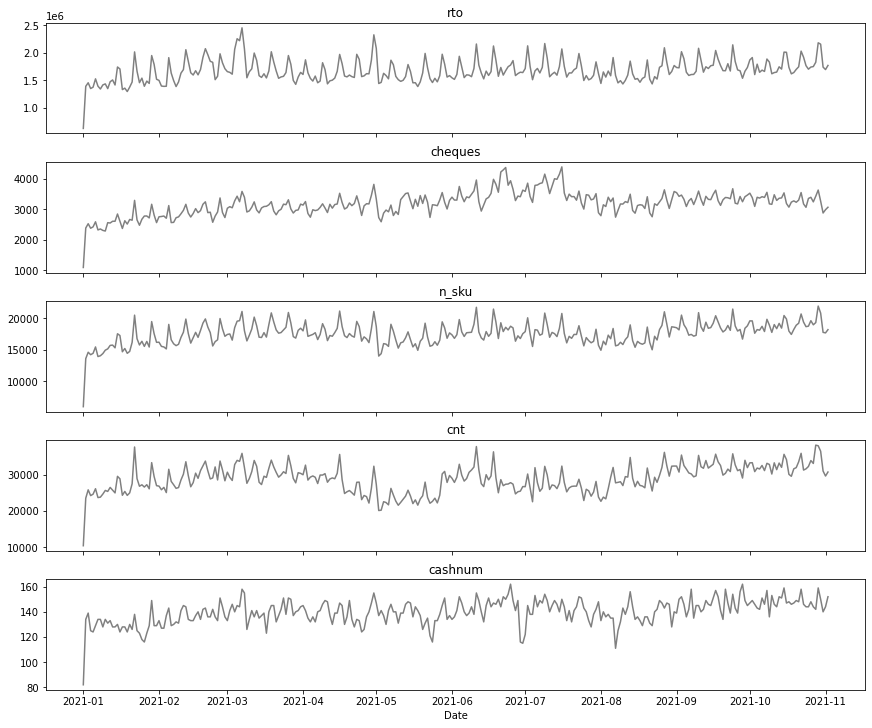

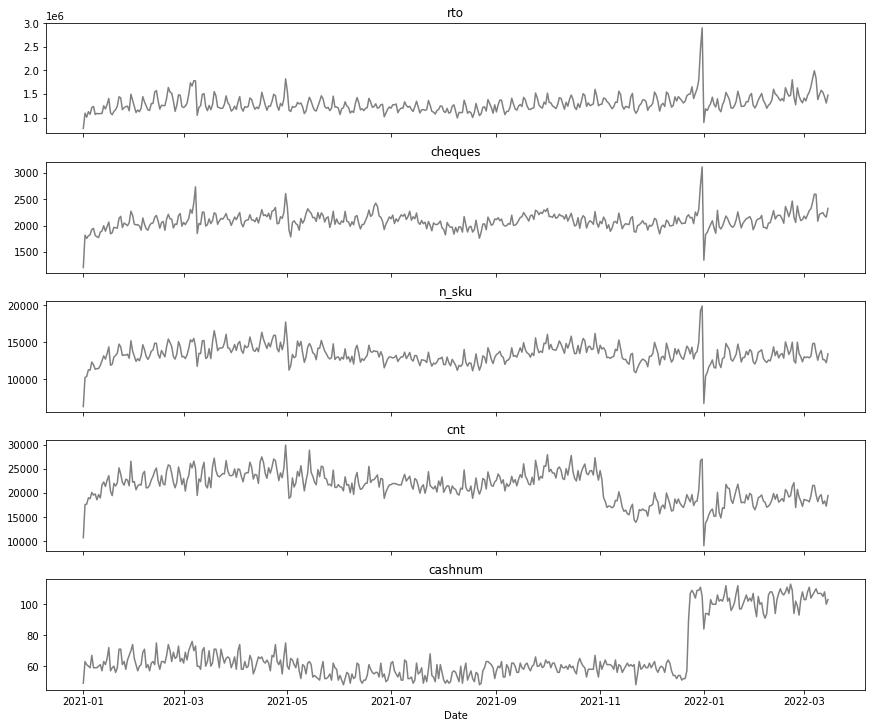

In [5]:
columns = ['rto', 'cheques', 'n_sku', 'cnt', 'cashnum']
for ou in df['ou'].unique():
    dd = df[df['ou']==ou]
    dd = dd.set_index('datetime')['2021-01-01':'2022-03-15']
    dd = dd[columns].resample('D').sum()

    show_plots(dd, columns)

In [6]:
outliers_fraction = 0.05
random_state = np.random.RandomState(42)

### HBOS

In [7]:
detector = HBOS(contamination=outliers_fraction)

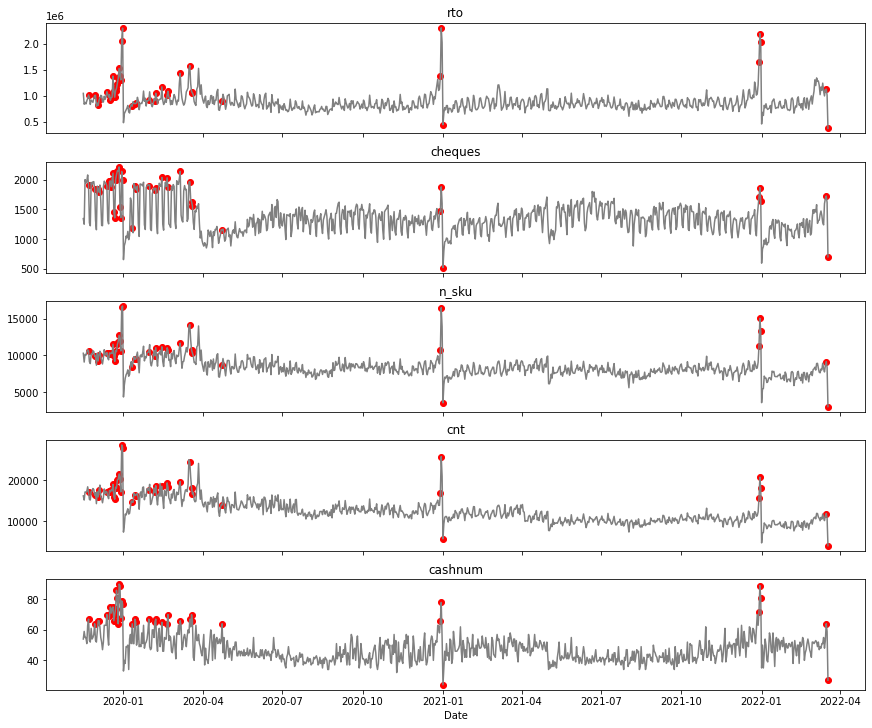

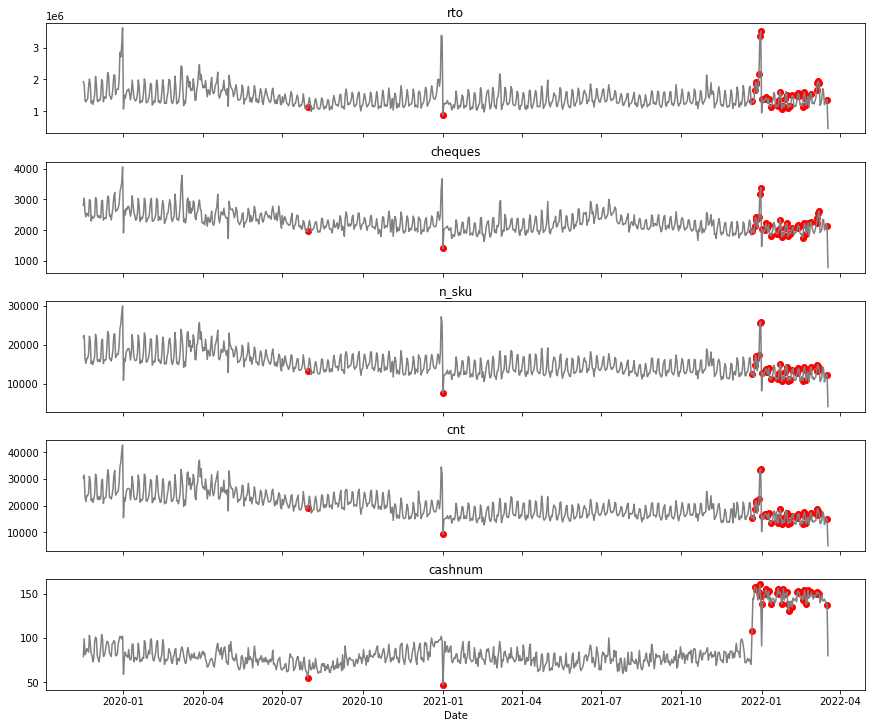

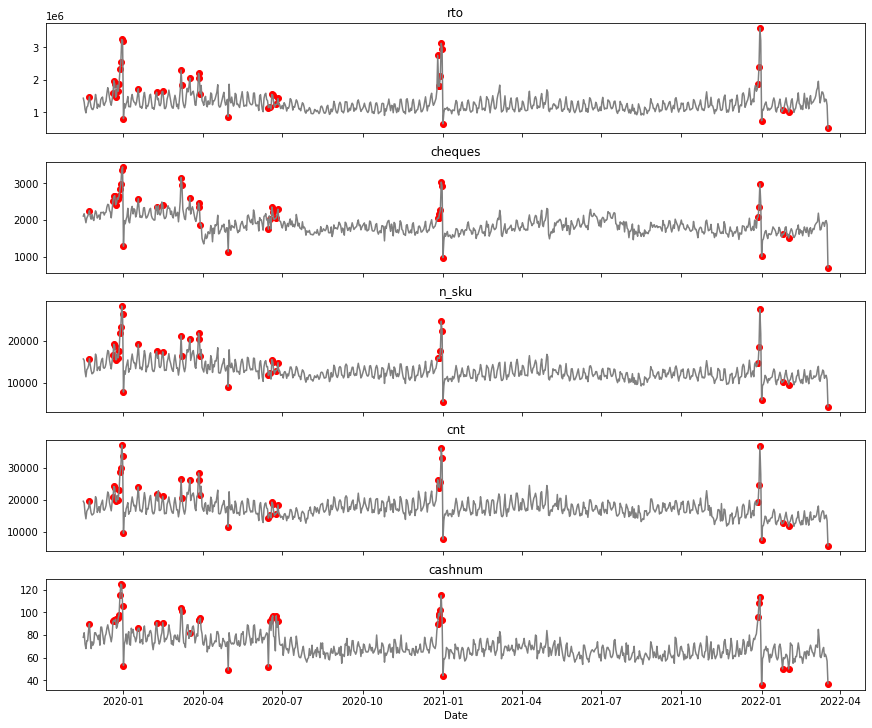

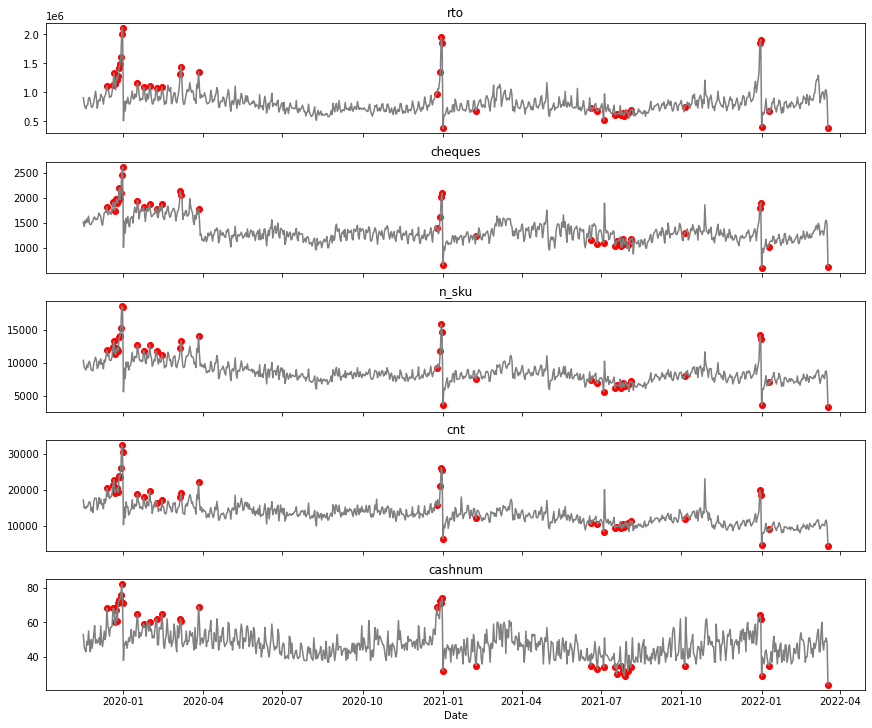

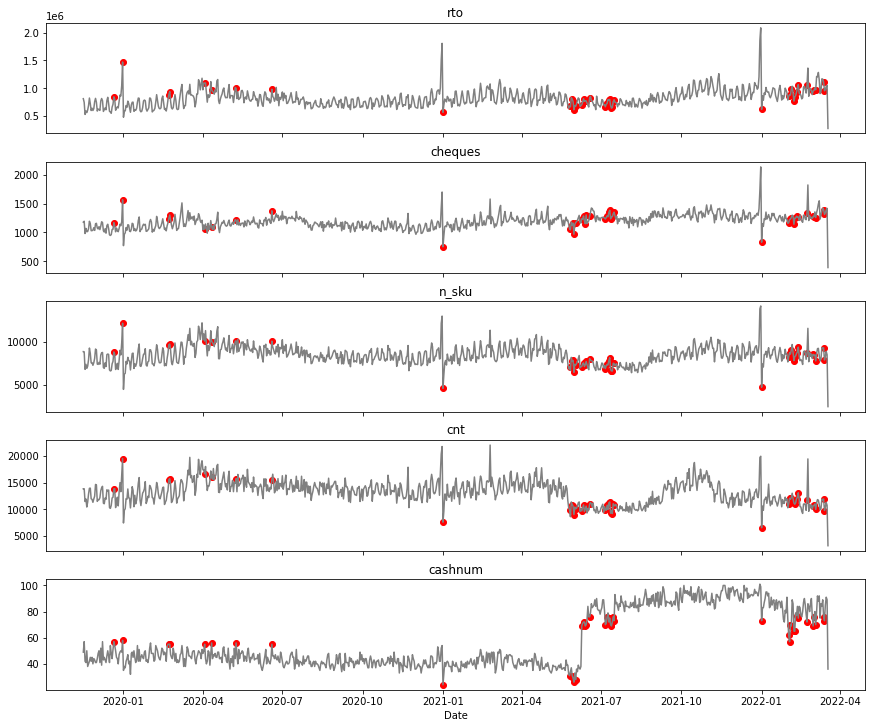

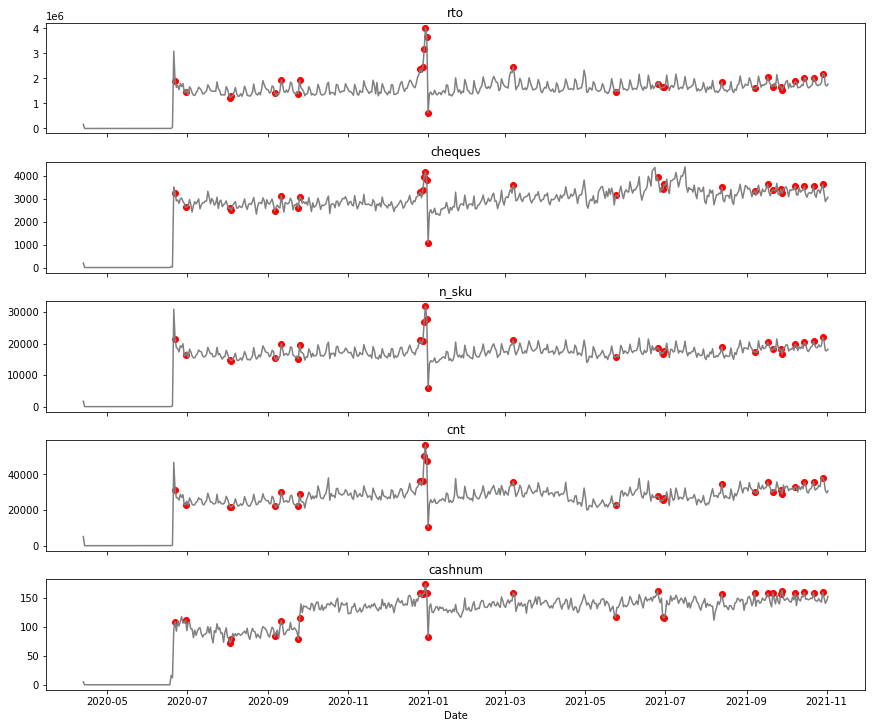

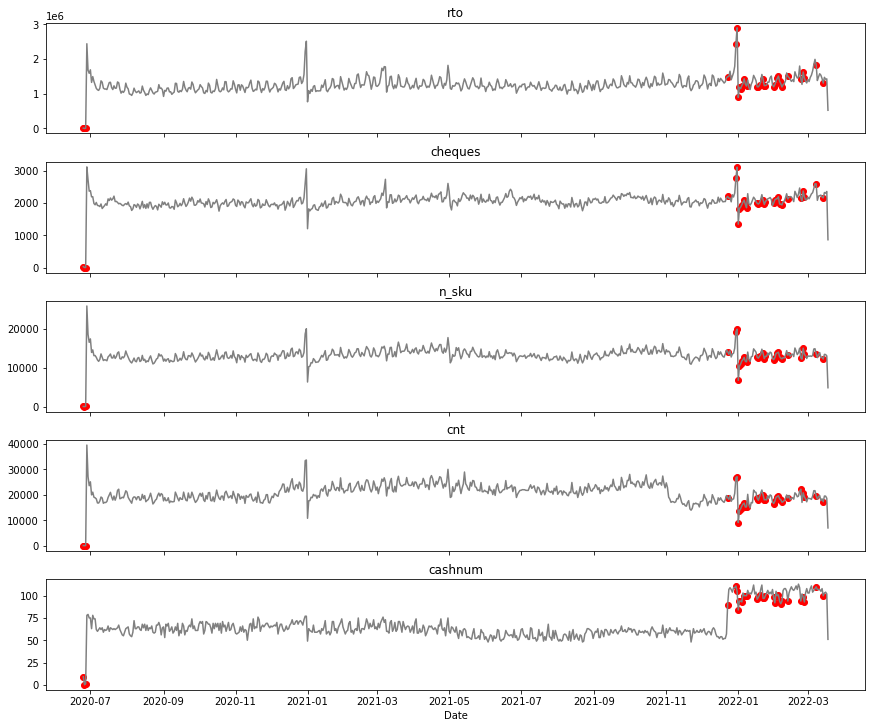

In [8]:
for ou in df.ou.unique():
    dd = df[df.ou==ou]
    dd = dd.set_index('datetime')
    dd = dd[columns].resample('D').sum()

    X = dd.values

    detector.fit(X)

    pred = detector.predict(X)

    dd['anomaly'] = pred
    show_plots(dd, columns, 'anomaly')